In [79]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix, classification_report, accuracy_score, recall_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [30]:
df =pd.read_csv(r"C:\Users\Avinash\Downloads\college_student_placement_dataset.csv")

In [31]:
df

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [33]:
df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


In [34]:
df.columns

Index(['College_ID', 'IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed', 'Placement'],
      dtype='object')

## NULL values

In [35]:
df.isna().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

## cheaking the Number of unique values

In [36]:
df.nunique()

College_ID                100
IQ                        104
Prev_Sem_Result           501
CGPA                      590
Academic_Performance       10
Internship_Experience       2
Extra_Curricular_Score     11
Communication_Skills       10
Projects_Completed          6
Placement                   2
dtype: int64

In [37]:
df['College_ID'].unique()

array(['CLG0030', 'CLG0061', 'CLG0036', 'CLG0055', 'CLG0004', 'CLG0015',
       'CLG0071', 'CLG0096', 'CLG0097', 'CLG0057', 'CLG0063', 'CLG0077',
       'CLG0064', 'CLG0017', 'CLG0053', 'CLG0040', 'CLG0070', 'CLG0050',
       'CLG0068', 'CLG0072', 'CLG0034', 'CLG0087', 'CLG0073', 'CLG0024',
       'CLG0008', 'CLG0025', 'CLG0018', 'CLG0014', 'CLG0006', 'CLG0082',
       'CLG0090', 'CLG0075', 'CLG0094', 'CLG0089', 'CLG0016', 'CLG0076',
       'CLG0047', 'CLG0054', 'CLG0058', 'CLG0100', 'CLG0046', 'CLG0001',
       'CLG0041', 'CLG0093', 'CLG0027', 'CLG0062', 'CLG0081', 'CLG0028',
       'CLG0020', 'CLG0051', 'CLG0069', 'CLG0088', 'CLG0038', 'CLG0029',
       'CLG0035', 'CLG0019', 'CLG0005', 'CLG0026', 'CLG0066', 'CLG0045',
       'CLG0043', 'CLG0074', 'CLG0048', 'CLG0012', 'CLG0099', 'CLG0011',
       'CLG0091', 'CLG0083', 'CLG0080', 'CLG0044', 'CLG0059', 'CLG0031',
       'CLG0039', 'CLG0065', 'CLG0079', 'CLG0095', 'CLG0085', 'CLG0033',
       'CLG0007', 'CLG0037', 'CLG0032', 'CLG0049', 

In [38]:
df.drop('College_ID',axis=1,inplace=True)

In [39]:
df

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,No,8,8,4,No
1,97,5.52,5.37,8,No,7,8,0,No
2,109,5.36,5.83,9,No,3,1,1,No
3,122,5.47,5.75,6,Yes,1,6,1,No
4,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...
9995,119,8.41,8.29,4,No,1,8,0,Yes
9996,70,9.25,9.34,7,No,0,7,2,No
9997,89,6.08,6.25,3,Yes,3,9,5,No
9998,107,8.77,8.92,3,No,7,5,1,No


## Feature Encoding (One-hot encoding, Label encoding)

In [40]:
leb_en=LabelEncoder()
df['Internship_Experience']=leb_en.fit_transform(df['Internship_Experience'])


In [41]:
df['Internship_Experience'].unique()

array([0, 1])

In [42]:
df['Placement']=df['Placement'].replace({'No':0,'Yes':1})

In [43]:
df

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,0,8,8,4,0
1,97,5.52,5.37,8,0,7,8,0,0
2,109,5.36,5.83,9,0,3,1,1,0
3,122,5.47,5.75,6,1,1,6,1,0
4,96,7.91,7.69,7,0,8,10,2,0
...,...,...,...,...,...,...,...,...,...
9995,119,8.41,8.29,4,0,1,8,0,1
9996,70,9.25,9.34,7,0,0,7,2,0
9997,89,6.08,6.25,3,1,3,9,5,0
9998,107,8.77,8.92,3,0,7,5,1,0


## Check Outliers

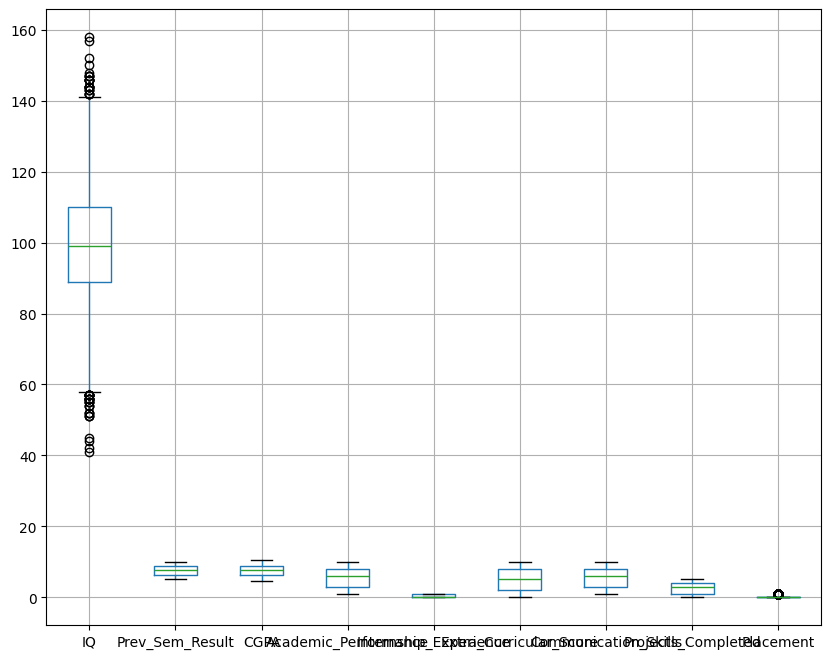

In [44]:
plt.figure(figsize=(10,8))
df.boxplot()
plt.show()

In [45]:
from datasist.structdata import detect_outliers

DF = df.select_dtypes(include="number")

for col in DF.columns:
    outliers = detect_outliers(df, 0, [col])  
    print(f"{col}: {len(outliers)} outliers")

IQ: 61 outliers
Prev_Sem_Result: 0 outliers
CGPA: 0 outliers
Academic_Performance: 0 outliers
Internship_Experience: 0 outliers
Extra_Curricular_Score: 0 outliers
Communication_Skills: 0 outliers
Projects_Completed: 0 outliers
Placement: 1659 outliers


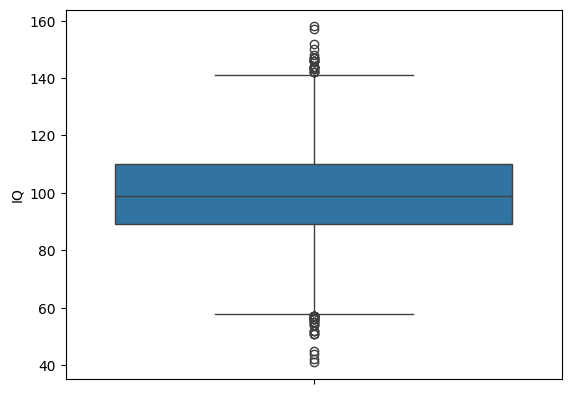

In [46]:
sns.boxplot(df['IQ'])
plt.show()

In [47]:
q1=df['IQ'].quantile(0.25)
q2=df['IQ'].quantile(0.5)
q3=df['IQ'].quantile(0.75)

print('Q1 ==', q1)
print('Q2 ==', q2)
print('Q3 ==', q3)

iqr = q3 - q1
print('IQR == ',iqr )

upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

print('Upper Limit == ', upper_limit)
print('Lower Limit == ', lower_limit)

Q1 == 89.0
Q2 == 99.0
Q3 == 110.0
IQR ==  21.0
Upper Limit ==  141.5
Lower Limit ==  57.5


In [48]:
df[(df['IQ']> upper_limit)].shape

(28, 9)

In [49]:
df['IQ'] = np.where(df['IQ'] > upper_limit, upper_limit, df['IQ'])
df

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107.0,6.61,6.28,8,0,8,8,4,0
1,97.0,5.52,5.37,8,0,7,8,0,0
2,109.0,5.36,5.83,9,0,3,1,1,0
3,122.0,5.47,5.75,6,1,1,6,1,0
4,96.0,7.91,7.69,7,0,8,10,2,0
...,...,...,...,...,...,...,...,...,...
9995,119.0,8.41,8.29,4,0,1,8,0,1
9996,70.0,9.25,9.34,7,0,0,7,2,0
9997,89.0,6.08,6.25,3,1,3,9,5,0
9998,107.0,8.77,8.92,3,0,7,5,1,0


In [50]:
df['IQ'] = np.where(df['IQ'] < lower_limit, lower_limit, df.IQ)
df

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107.0,6.61,6.28,8,0,8,8,4,0
1,97.0,5.52,5.37,8,0,7,8,0,0
2,109.0,5.36,5.83,9,0,3,1,1,0
3,122.0,5.47,5.75,6,1,1,6,1,0
4,96.0,7.91,7.69,7,0,8,10,2,0
...,...,...,...,...,...,...,...,...,...
9995,119.0,8.41,8.29,4,0,1,8,0,1
9996,70.0,9.25,9.34,7,0,0,7,2,0
9997,89.0,6.08,6.25,3,1,3,9,5,0
9998,107.0,8.77,8.92,3,0,7,5,1,0


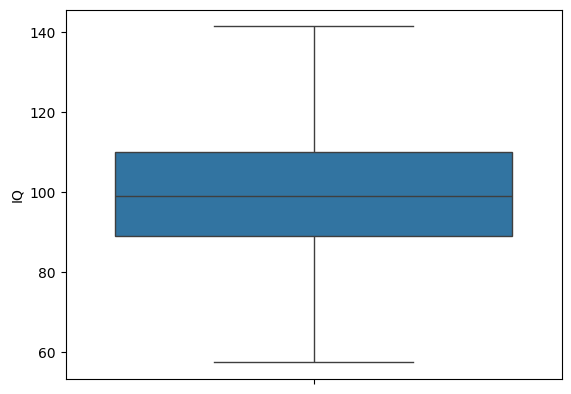

In [51]:
sns.boxplot(df['IQ'])
plt.show()

In [52]:
x = df.drop('Placement',axis=1)
y=df['Placement']

In [53]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2,random_state=1)

In [54]:
x_train.shape

(8000, 8)

In [55]:
x_test.shape

(2000, 8)

## Logistic Regression

In [56]:
log_mod=LogisticRegression()
log_mod.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [57]:
y_pred=log_mod.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(2000,))

In [58]:
conf_max=confusion_matrix(y_test, y_pred)
print(conf_max)
print()

clss_repo = classification_report(y_test,y_pred)
print(clss_repo)

[[1593   76]
 [ 148  183]]

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1669
           1       0.71      0.55      0.62       331

    accuracy                           0.89      2000
   macro avg       0.81      0.75      0.78      2000
weighted avg       0.88      0.89      0.88      2000



In [59]:
y_pred_train=log_mod.predict(x_train)
y_pred
conf_max=confusion_matrix(y_train, y_pred_train)
print(conf_max)
print()

clss_repo = classification_report(y_train, y_pred_train)
print(clss_repo)

[[6367  305]
 [ 550  778]]

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      6672
           1       0.72      0.59      0.65      1328

    accuracy                           0.89      8000
   macro avg       0.82      0.77      0.79      8000
weighted avg       0.89      0.89      0.89      8000



## hyperparameter tuning

In [60]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [61]:
ridge_model = RidgeClassifier(alpha=0.1)
param_grid = {'alpha': [0.01,0.12,0.58,0.005,0.6,0.7,0.03]}
gscv_ridge_model = GridSearchCV(ridge_model, param_grid, cv = 5)
gscv_ridge_model.fit(x_train, y_train)

,estimator,RidgeClassifier(alpha=0.1)
,param_grid,"{'alpha': [0.01, 0.12, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.01


In [62]:
y_pred=gscv_ridge_model.predict(x_test)
conf_max=confusion_matrix(y_test, y_pred)
print(conf_max)
print()

clss_repo = classification_report(y_test,y_pred)
print(clss_repo)

[[1660    9]
 [ 214  117]]

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1669
           1       0.93      0.35      0.51       331

    accuracy                           0.89      2000
   macro avg       0.91      0.67      0.72      2000
weighted avg       0.89      0.89      0.87      2000



In [63]:
y_pred_train=gscv_ridge_model.predict(x_train)
y_pred
conf_max=confusion_matrix(y_train, y_pred_train)
print(conf_max)
print()

clss_repo = classification_report(y_train, y_pred_train)
print(clss_repo)

[[6631   41]
 [ 876  452]]

              precision    recall  f1-score   support

           0       0.88      0.99      0.94      6672
           1       0.92      0.34      0.50      1328

    accuracy                           0.89      8000
   macro avg       0.90      0.67      0.72      8000
weighted avg       0.89      0.89      0.86      8000



## Decision Tree

In [64]:
dt_clf = DecisionTreeClassifier(max_depth=6,random_state=20)
dt_clf.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,20
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [65]:
y_pred=dt_clf.predict(x_test)
conf_max=confusion_matrix(y_test, y_pred)
print(conf_max)
print()

clss_repo = classification_report(y_test,y_pred)
print(clss_repo)

[[1669    0]
 [   0  331]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1669
           1       1.00      1.00      1.00       331

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [66]:
y_pred_train=dt_clf.predict(x_train)
y_pred
conf_max=confusion_matrix(y_train, y_pred_train)
print(conf_max)
print()

clss_repo = classification_report(y_train, y_pred_train)
print(clss_repo)

[[6672    0]
 [   0 1328]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6672
           1       1.00      1.00      1.00      1328

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



## hyperparameter tuning

In [67]:
dt_clf = DecisionTreeClassifier(random_state=20)

hyp = {'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':np.arange(3,12),
    'min_samples_split': np.arange(5,20),   # branch node
    'min_samples_leaf':np.arange(2,15) ,}   # leaf node

gscv_dt_clf = GridSearchCV(dt_clf, hyp, cv=5)
gscv_dt_clf.fit(x_train, y_train)

,estimator,DecisionTreeC...ndom_state=20)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': array([ 3, 4..., 9, 10, 11]), 'min_samples_leaf': array([ 2, 3..., 12, 13, 14]), 'min_samples_split': array([ 5, 6..., 17, 18, 19]), ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [68]:
dt_clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=13,
                       random_state=20, splitter='random')
dt_clf.fit(x_train, y_train)

,criterion,'gini'
,splitter,'random'
,max_depth,4
,min_samples_split,13
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,20
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [69]:
# Testing Data Evaluation
y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :\n',cnf_matrix)

clf_report = classification_report(y_test, y_pred)
print('Classification report :\n', clf_report)

Confusion Matrix :
 [[1470  199]
 [  11  320]]
Classification report :
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      1669
           1       0.62      0.97      0.75       331

    accuracy                           0.90      2000
   macro avg       0.80      0.92      0.84      2000
weighted avg       0.93      0.90      0.90      2000



In [70]:
# training Data Evaluation
y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix :\n',cnf_matrix)

clf_report = classification_report(y_train, y_pred_train)
print('Classification report :\n', clf_report)

Confusion Matrix :
 [[5924  748]
 [  34 1294]]
Classification report :
               precision    recall  f1-score   support

           0       0.99      0.89      0.94      6672
           1       0.63      0.97      0.77      1328

    accuracy                           0.90      8000
   macro avg       0.81      0.93      0.85      8000
weighted avg       0.93      0.90      0.91      8000



## pruning

In [71]:
dt_clf = DecisionTreeClassifier(random_state=20 , ccp_alpha=0.0)
dt_clf.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,20
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [72]:
# Testing Data Evaluation
y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :\n',cnf_matrix)

clf_report = classification_report(y_test, y_pred)
print('Classification report :\n', clf_report)

Confusion Matrix :
 [[1669    0]
 [   0  331]]
Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1669
           1       1.00      1.00      1.00       331

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [73]:
# training Data Evaluation
y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix :\n',cnf_matrix)

clf_report = classification_report(y_train, y_pred_train)
print('Classification report :\n', clf_report)

Confusion Matrix :
 [[6672    0]
 [   0 1328]]
Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6672
           1       1.00      1.00      1.00      1328

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [74]:
result = dt_clf.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas_list = result['ccp_alphas']
ccp_alphas_list

array([0.        , 0.01252841, 0.01703451, 0.02637471, 0.03119881,
       0.03381965, 0.05159125])

In [75]:
train_data_accuracy = []
test_data_accuracy = []

for ccp_alpha_iteration in ccp_alphas_list:
    dt_clf = DecisionTreeClassifier(random_state=20, ccp_alpha=ccp_alpha_iteration)
    dt_clf.fit(x_train, y_train)
    
    train_accuracy = dt_clf.score(x_train, y_train)
    train_data_accuracy.append(train_accuracy)
    
    test_accuracy = dt_clf.score(x_test, y_test)
    test_data_accuracy.append(test_accuracy)
    
    print(ccp_alpha_iteration , '>>', train_accuracy, '>>', test_accuracy)

0.0 >> 1.0 >> 1.0
0.012528409090909094 >> 0.992125 >> 0.9925
0.017034509202453987 >> 0.98 >> 0.9745
0.026374706625744728 >> 0.937875 >> 0.9265
0.031198812668247533 >> 0.921375 >> 0.9175
0.03381965446420511 >> 0.898625 >> 0.893
0.05159124734847506 >> 0.834 >> 0.8345


In [76]:
import joblib

In [83]:
def evaluate_model(model, x_train, y_train, X_test, y_test):
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(X_test)
    
    results = {
        "Train Accuracy": accuracy_score(y_train, y_pred_train),
        "Test Accuracy": accuracy_score(y_test, y_pred_test),
        "Train Recall": recall_score(y_train, y_pred_train),
        "Test Recall": recall_score(y_test, y_pred_test)
    }
    return results

In [84]:
models = {
    "Logistic Regression": gscv_ridge_model,
    "Decision Tree": dt_clf,
}

results = {name: evaluate_model(model, x_train, y_train, x_test, y_test) 
           for name, model in models.items()}

df_results = pd.DataFrame(results).T
print(df_results)


                     Train Accuracy  Test Accuracy  Train Recall  Test Recall
Logistic Regression        0.885375         0.8885      0.340361     0.353474
Decision Tree              0.834000         0.8345      0.000000     0.000000


Let’s compare both models:

### 1. Logistic Regression

- Train Accuracy: 88.5%
- Test Accuracy: 88.8% (very close → not overfitting)
- Recall: ~34–35% (better at detecting positives than Decision Tree).

### 2. Decision Tree

- Train Accuracy: 83.4%
- Test Accuracy: 83.4%
- Recall: 0% (means it completely failed to identify the positive cases).

### Best Model → Logistic Regression

- Because it has higher accuracy, much better recall, and shows balanced performance on training and testing.

- Decision Tree is not suitable here because recall = 0 → it predicts all cases as negative.

In [85]:
joblib.dump(gscv_ridge_model,'placement_model.pkl')

['placement_model.pkl']